In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pydae.bmapu import bmapu_builder


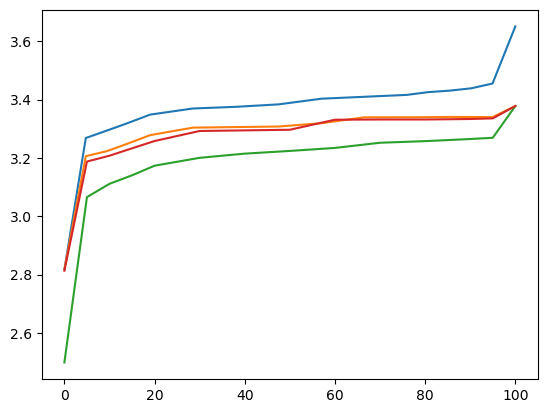

In [ ]:
Discharge = np.array([		
# SOC/%,   Dynamic/V, Static/V
[100,	3.377812,	3.377812],
[ 95,	3.269052,	3.335569],
[ 90,	3.264910,	3.333467],
[ 85,	3.261151,	3.332511],
[ 80,	3.257583,	3.331746],
[ 70,	3.252040,	3.331746],
[ 60,	3.234328,	3.330982],
[ 50,	3.224006,	3.296576],
[ 40,	3.214768,	3.294474],
[ 30,	3.200432,	3.292371],
[ 20,	3.173353,	3.257966],
[ 15,	3.140477,	3.232926],
[ 10,	3.111296,	3.207695],
[  5,	3.065741,	3.187625],
[  0,	2.499053,	2.813560]])


Charge = np.array([				
# SOC/%,   Dynamic/V, Static/V
[     0,	2.817575, 2.817575],
[  4.75,	3.268287, 3.205975],
[  9.50,	3.294155, 3.223560],
[ 14.24,	3.320596, 3.250320],
[ 18.99,	3.348376, 3.278036],
[ 28.49,	3.369465, 3.303840],
[ 37.98,	3.375136, 3.305751],
[ 47.48,	3.383546, 3.307662],
[ 56.97,	3.402978, 3.318940],
[ 66.47,	3.409541, 3.339201],
[ 75.96,	3.416104, 3.339392],
[ 80.71,	3.425597, 3.339774],
[ 85.46,	3.430631, 3.340539],
[ 90.21,	3.438531, 3.340348],
[ 94.95,	3.455033, 3.339774],
[100.00,	3.650507, 3.377812]])

fig,axes = plt.subplots(nrows=1)
axes.plot(Charge[:,0], Charge[:,1])
axes.plot(Charge[:,0], Charge[:,2])
axes.plot(Discharge[:,0], Discharge[:,1])
axes.plot(Discharge[:,0], Discharge[:,2])

# for ax in axes.flatten():
#     ax.grid()


In [19]:
import temp

model = temp.model()
model.Dt = 1.0
model.decimation = 1

model.ini({'A_loss_1':0.0,'R_bat_1':0.02,'soc_ref_1':1.0, 'soc_min_1':0.01 },'xy_0.json')
model.run(2.0*3600,{'p_s_ref_1':0.5}) # half an hour discharging
model.run(4.0*3600,{'p_s_ref_1':-0.95}) # half an hour discharging
model.post()

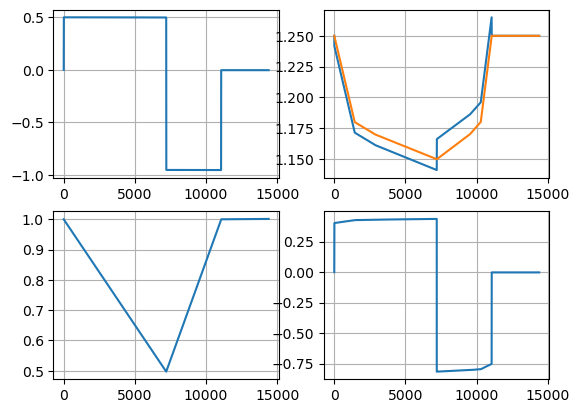

In [21]:
fig,axes = plt.subplots(nrows=2,ncols=2)
axes[0,0].plot(model.Time, model.get_values('p_dc_1'))
axes[1,0].plot(model.Time, model.get_values('soc_1'))
axes[0,1].plot(model.Time, model.get_values('v_dc_1'))
axes[0,1].plot(model.Time, model.get_values('e_1'))
axes[1,1].plot(model.Time, model.get_values('i_dc_1'))

for ax in axes.flatten():
    ax.grid()

# axes[1,0].set_ylim(0.009,0.011)

In [18]:
model.get_value('K_p_1')

1e-06

In [4]:
model = temp.model()
model.Dt = 1.0
model.decimation = 1

model.ini({'A_loss_1':0.0,'R_bat_1':0.1},'xy_0.json')
model.run(1.5*3600,{'p_s_ref_1':1.0}) # an hour discharging
model.post()

UnboundLocalError: local variable 'values' referenced before assignment

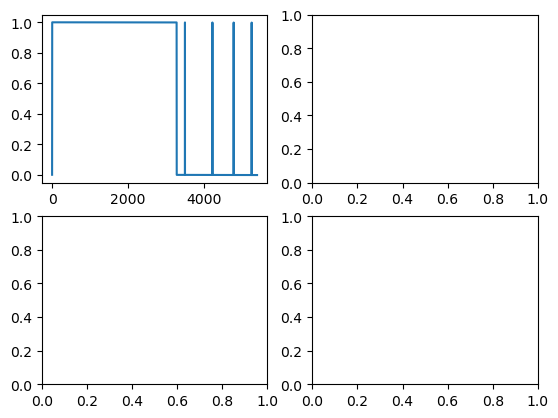

In [5]:
fig,axes = plt.subplots(nrows=2,ncols=2)
axes[0,0].plot(model.Time, model.get_values('p_dc_1'))
axes[1,0].plot(model.Time, model.get_values('sigma_1'))
axes[0,1].plot(model.Time, model.get_values('v_dc_1'))
axes[1,1].plot(model.Time, model.get_values('i_dc_1'))

for ax in axes.flatten():
    ax.grid()

axes[1,0].set_ylim(-0.001,0.001)

In [ ]:
model.report_params()

S_base =100000000.00
U_1_n =20000.00
K_p_1 = 0.00
K_i_1 = 0.00
soc_min_1 = 0.00
soc_max_1 = 1.00
S_n_1 =10000000.00
E_kWh_1 =20000.00
A_loss_1 = 0.00
B_loss_1 = 0.00
C_loss_1 = 0.00
R_bat_1 =10.00
K_p_agc = 0.00
K_i_agc = 0.00
K_xif = 0.00


In [ ]:
np.array([600, 650, 680, 700,710,750])/600

array([1.        , 1.08333333, 1.13333333, 1.16666667, 1.18333333,
       1.25      ])